# .............................. Forcasting Google Stock data by python
## ........................................................... Zakarea Mosa
## ............................................................201469800
## ...................................... Major:Managment Information System
##  .................................................................  for
## ................................................. Dr. Mohmmed Al-khars
## .............................................................. OM-210



# Project objective
###  This project will try to forcast the closing price of Google stock prises from dataset of Nasdaq website(this dataset has more than 1000 rows) and will compare the forcasted prises with the actual prises. This project will use regression analysis to do the forcasting.

# Tools used and justification
### to discover this huge set of data, MS Excel cannot be used. instead, Python programming language will be used to gain compelete insight, Because python is common tool that specilzed in dealing with this type of issues.  Python has many programming libraries in statistics .

### in the two coming code cells , important libararies for this project will be imported
### Pandas : this libarary used to load the dataset to this file.
### farthermore, it help to show samples of this dataset
### numby : this library used to do the numrical operations.
### sklearn : in this project I will use this library to do the forcasting by regression method.
### matplotlib: this library used to do the data visualization.

In [76]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline 
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('GOOGL.csv')

### The above code will load the data into this file by Pandas.
### And in the below code first 10 rows of the dataset will be displayed.

In [78]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-09,771.099976,776.090027,752.010010,762.549988,762.549988,2327500
1,2015-12-10,763.590027,766.070007,755.000000,760.039978,760.039978,1622900
2,2015-12-11,749.000000,757.440002,748.650024,750.419983,750.419983,2159200
3,2015-12-14,751.260010,764.150024,736.260010,762.539978,762.539978,2693200
4,2015-12-15,767.789978,774.750000,758.000000,760.090027,760.090027,2469300
5,2015-12-16,766.570007,781.500000,757.049988,776.590027,776.590027,2656000
6,2015-12-17,781.159973,781.590027,769.299988,769.830017,769.830017,1825500
7,2015-12-18,767.229980,774.140015,756.590027,756.849976,756.849976,3389700
8,2015-12-21,763.049988,766.349976,754.150024,760.799988,760.799988,1742400
9,2015-12-22,764.270020,770.340027,761.200012,767.130005,767.130005,1816900


In [79]:
df['Date'] = pd.to_datetime(df.Date)

In [80]:
df.drop('Adj Close',axis = 1,inplace= True)

### The above code will drop "Adj Close" column because it is not needed in this project.





# Data analysis and Discussion part
### this part will discover this dataset and will make a regression model to forcasting.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
Date      1259 non-null datetime64[ns]
Open      1259 non-null float64
High      1259 non-null float64
Low       1259 non-null float64
Close     1259 non-null float64
Volume    1259 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [82]:
df.shape

(1259, 6)

In [83]:
df.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1086.605766,1097.011731,1076.126570,1086.996021,1.835547e+06
std,252.589317,256.592644,249.640484,253.245127,8.811597e+05
min,682.489990,683.330017,672.659973,681.140015,5.206000e+05
25%,847.820007,852.100006,843.505005,849.375000,1.294850e+06
50%,1084.020020,1094.839966,1070.890015,1084.089966,1.588700e+06
75%,1224.059998,1236.369995,1214.535034,1225.005005,2.092650e+06
max,1820.540039,1843.829956,1817.000000,1824.969971,7.039900e+06


### the above codes shows that there are 1259 rows and 6 columns in this dataset. and also found that 
### the data have 5 variables if date column was ignored.

### Therefore,  the below codes will divide all variables into 2 sets of array
### Independent and dependent.

### After that, the regression model will be created using Sklearn library which is imported in the first code.

In [84]:
ind = df[['Open','High','Low','Volume']]
dep = df['Close']

In [85]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(ind, dep, random_state = 0)

In [86]:
x_train.shape

(944, 4)

In [87]:
x_test.shape

(315, 4)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [89]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print(regressor.coef_)

[-5.95366632e-01  8.48408385e-01  7.44703218e-01 -3.78676955e-07]


In [91]:
forcasted = regressor.predict(x_test)

### In the above codes Linear Regression model was created and the foracsted data are created by  predict method in Sklearn library .
### After that , I will load both 'actual close price' and 'forcasted close price'  into one data frame and save as MS Excel file .

In [92]:
df_f = pd.DataFrame({'Actual':y_test,'forcasted':forcasted})

df_f.to_csv('forcstedVsActual.csv') 

### The below code will show the first 30 rows of the forcasted data versus the actual to compare how the defrenece.

In [93]:
df_f.head(30)

,Actual,forcasted
5,776.590027,771.964385
494,1056.520020,1057.231223
52,729.119995,721.525932
986,1309.000000,1313.787913
186,808.020020,806.788651
18,759.330017,761.583400
317,868.390015,864.730748
511,1079.780029,1076.279306
364,964.070007,963.175089
571,1100.069946,1096.474524


### Here I used matplotlip libaray to make a visualization for comparing the actual versus the forcasted for the first 10 rows because more 300 rows and cannot be displayed in one graph.

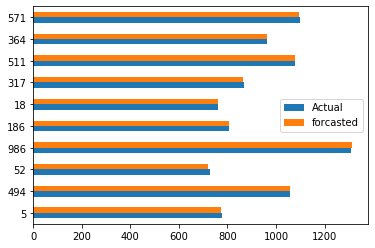

In [94]:
df_f.head(10).plot(kind='barh')

In [95]:
print('MAE:',metrics.mean_absolute_error(y_test,forcasted))

MAE: 4.676034871210051


### Mean Absolute Error (MAE): 4.6760    

# Conclusion 
### From the first 30  rows  and the plot of the forcasted and the actual it appears that the regression model has suceeded to forecast the close price signficantly . 
### Mean Absolute Error (MAE )measures the average magnitude of the errors in a set of predictions, without considering their direction.
### in this foracsting model on average, the forecast's distance from the true value is 4.6760. Which implies there no signficant deference between the forcasted and the actual close price which is means the model was almost perfect in forcasting this huge data set.

### References:
### https://finance.yahoo.com/quote/GOOGL/history?period1=1449619200&period2=1607472000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
### https://www.kaggle.com/
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### https://realpython.com/train-test-split-python-data/